# Prediccion de rating de usuarios a nuevos juegos de mesa.

https://www.kaggle.com/datasets/andrewmvd/board-games

In [53]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import pickle


In [4]:
df = pd.read_csv("../data/processed/bgg_proc_ml.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   20343 non-null  float64
 1   Name                 20343 non-null  object 
 2   Year Published       20343 non-null  int64  
 3   Min Players          20343 non-null  int64  
 4   Max Players          20343 non-null  int64  
 5   Play Time            20343 non-null  int64  
 6   Min Age              20343 non-null  int64  
 7   Users Rated          20343 non-null  int64  
 8   Rating Average       20343 non-null  float64
 9   BGG Rank             20343 non-null  int64  
 10  Complexity Average   20343 non-null  float64
 11  Owned Users          20343 non-null  int64  
 12  Mechanics            20343 non-null  object 
 13  Domains              20343 non-null  object 
 14  Mech Not Defined     20343 non-null  int64  
 15  Mech_Acting          20343 non-null 

In [6]:
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,...,Mech_solo,Abstract,Children,Customizable,Family,Party,Strategy,Thematic,Wargames,Domain_Not Defined
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,...,1,0,0,0,0,0,1,1,0,0
1,161936.0,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,...,0,0,0,0,0,0,1,1,0,0
2,224517.0,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,...,0,0,0,0,0,0,1,0,0,0
3,167791.0,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,...,1,0,0,0,0,0,1,0,0,0
4,233078.0,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,...,0,0,0,0,0,0,1,1,0,0


In [7]:
df["Domains"].unique()

array(['Strategy Games, Thematic Games', 'Strategy Games',
       'Thematic Games', 'Strategy Games, Wargames',
       'Thematic Games, Wargames', 'Family Games, Strategy Games',
       'Customizable Games, Thematic Games',
       'Abstract Games, Family Games', 'Customizable Games',
       'Family Games', 'Party Games', 'Customizable Games, Wargames',
       'Wargames', 'Party Games, Thematic Games', 'Abstract Games',
       'Customizable Games, Strategy Games',
       'Family Games, Thematic Games', 'Family Games, Party Games',
       'Abstract Games, Strategy Games', "Children's Games, Family Games",
       'Not Defined', 'Party Games, Strategy Games', "Children's Games",
       "Children's Games, Party Games",
       'Abstract Games, Customizable Games',
       'Family Games, Strategy Games, Thematic Games',
       'Family Games, Party Games, Thematic Games',
       'Strategy Games, Thematic Games, Wargames',
       'Abstract Games, Party Games', "Abstract Games, Children's Games",

In [7]:
df["Mechanics"].unique()

array(['Action Queue, Action Retrieval, Campaign / Battle Card Driven, Card Play Conflict Resolution, Communication Limits, Cooperative Game, Deck Construction, Deck Bag and Pool Building, Grid Movement, Hand Management, Hexagon Grid, Legacy Game, Modular Board, Once-Per-Game Abilities, Scenario / Mission / Campaign Game, Simultaneous Action Selection, Solo / Solitaire Game, Storytelling, Variable Player Powers',
       'Action Points, Cooperative Game, Hand Management, Legacy Game, Point to Point Movement, Set Collection, Trading, Variable Player Powers',
       'Hand Management, Income, Loans, Market, Network and Route Building, Score-and-Reset Game, Tech Trees / Tech Tracks, Turn Order: Stat-Based, Variable Set-up',
       ...,
       'Auction/Bidding, Income, Loans, Lose a Turn, Player Elimination, Roll / Spin and Move, Set Collection, Stock Holding, Track Movement, Trading',
       'Betting and Bluffing, Bingo, Pattern Recognition',
       'Dice Rolling, Grid Movement, Race, Roll 

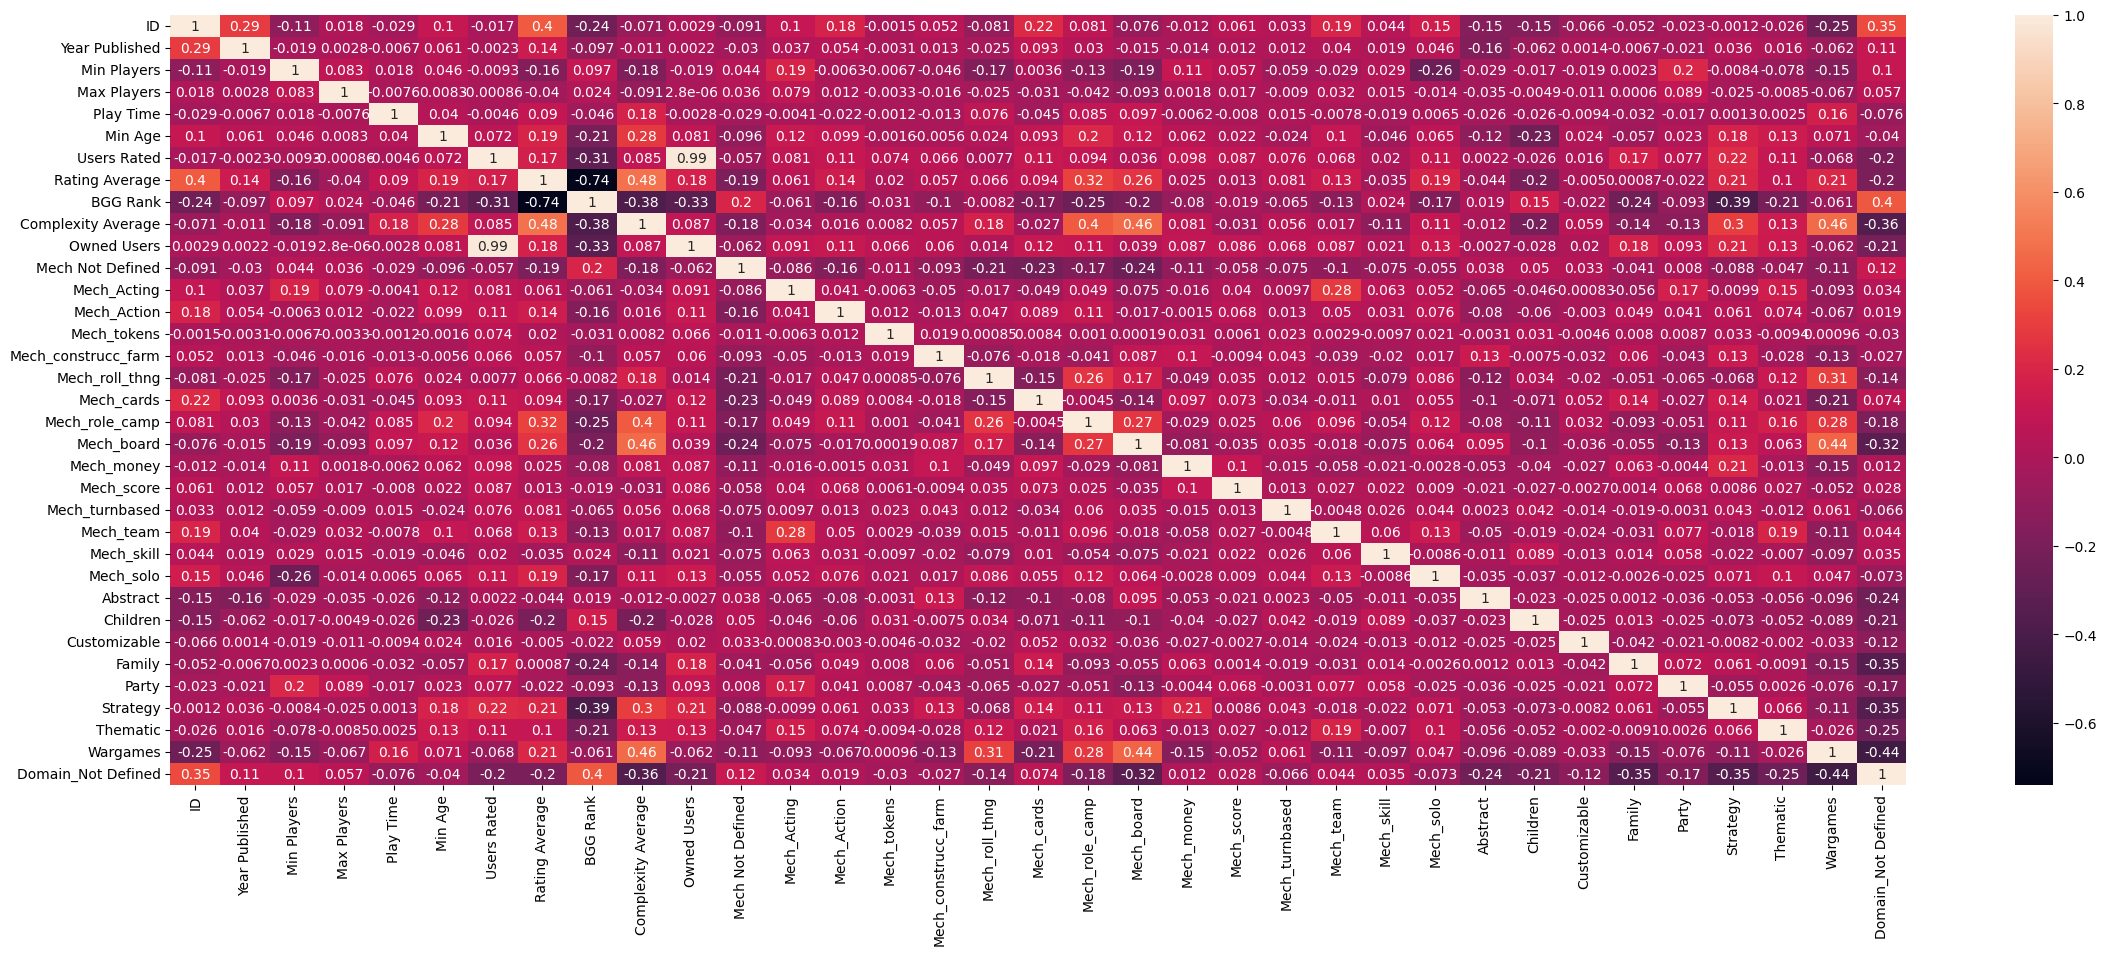

In [11]:
plt.figure(figsize=(28,10))
sns.heatmap(df.corr(),annot=True);

Voy a coger para X las variables que tienen más correlacion con Rating Average (ya sea positiva o negativa)

In [14]:
# X = df.drop(["Mechanics","Rating Average","Domains","ID","Name"],axis=1)
X = df[["BGG Rank","Complexity Average","Mech_role_camp","Strategy","Wargames"]]
y = df["Rating Average"]

Fabricamos nuestras variables de test.

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

Probamos con una regresion lineal primero con polinomio de grado 2

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for i in range(1,5):
    poly_reg = PolynomialFeatures(i)
    poly_reg.fit(X_train)
    X_train_poly = poly_reg.transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train_poly, y_train)
    train_prediction = pol_reg.predict(X_train_poly)
    print(f"Valores para polinomios de grado {i}")
    print(pol_reg.score(X_train_poly, y_train))
    print("MAE train", mean_absolute_error(y_train, train_prediction))
    print("MSE train", mean_squared_error(y_train, train_prediction),"\n")
    

Valores para polinomios de grado 1
0.6138919022930287
MAE train 0.42522919854725794
MSE train 0.3383954573350702 

Valores para polinomios de grado 2
0.6982788230357495
MAE train 0.37980294271292886
MSE train 0.2644365043697703 

Valores para polinomios de grado 3
0.73493412712813
MAE train 0.3565635114095257
MSE train 0.23231081608257215 

Valores para polinomios de grado 4
0.5359090225802166
MAE train 0.46265415602952226
MSE train 0.40674173756447446 



Vemos que el score a medida que vamos subiendo el grado del polinomio vamos bajando el error hasta que en polinomio de grado 4 vemos que tanto el error como el score baja drasticamente

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
pol_reg_3 = LinearRegression()
pol_reg_3.fit(X_train_poly, y_train)
train_prediction = pol_reg.predict(X_train_poly)

Guardamos el modelo con ese modelo lineal

In [59]:
pickle.dump(pol_reg_3, open('../models/trn_pol_3.pkl', 'wb'))

In [47]:
dtr = DecisionTreeRegressor(max_depth = 10,max_features =5, random_state=0)
dtr.fit(X_train, y_train)
# dtr.fit(X_train_scal, y_train)

DecisionTreeRegressor(max_depth=10, max_features=5, random_state=0)

In [51]:
print("Train Score",dtr.score(X_train, y_train))
y_pred = dtr.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Train Score 0.7973305227240064
R2 0.7024539044910751
MAE 0.35521745527880294
MSE 0.2599715401786329
RMSE 0.5098740434446853


In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score


R2 0.7024539044910751
MAE 0.35521745527880294
MAPE 0.05626662188928657
MSE 0.2599715401786329
RMSE 0.5098740434446853
